Firstly we are going to import all of the libraries that we will need

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

Now we are going to define df as our data set and import the csv file 

In [2]:
df = pd.read_csv('fortune500.csv')

Okay so now that we have that input and read we are going to see if it worked by printing out the head (top vales) and bottom values. We can see that when df.head() is left blank then the default output value is 5. However we can specify this as I have done for the tail end (10)

In [3]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [4]:
df.tail(10)

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25490,2005,491,Level 3 Communications,3712.0,-458
25491,2005,492,Brinker International,3707.5,154
25492,2005,493,Stater Bros. Holdings,3704.9,71.8
25493,2005,494,Western & Southern Financial,3694.5,328
25494,2005,495,Gateway,3649.7,-567.6
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


Now I am renaming the columns to streamline everytyhing just a bit. Since I went back and re-executed the above two cells after the following comand they are displaying the updated values however they were not initially.

In [5]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

Now we are checking to make sure that we have all of the data in our set. By using len which returns the number of items (rows) in an object, in this case df (our dataset)

In [6]:
len(df)

25500

Now we are checking that all of the data has been imported as expected by checking the data types in our df file

In [7]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

We see that our profits column is an object instead of a float64 like we would have expected. This is likeley because there are non-integer values so we need to evealuate by looking at any non_numberic_profits

In [8]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


As we can see some of the values are actually strings which have been used to indicate missing data. Our next step is to make sure thats all the un-expected values and there is nothing else.

In [9]:
set(df.profit[non_numberic_profits])

{'N.A.'}

So its only missing data that is giving us issues. Now we are going to evaluate how many lines have any non numerical datya by again listing the objects that are non numeric

In [10]:
len(df.profit[non_numberic_profits])

369

So there are only 369 which is a small portion opf our data, so we can likely just get rid of it, we first need to make sure that there is a proportional spread so we are going to plot these missing values against time

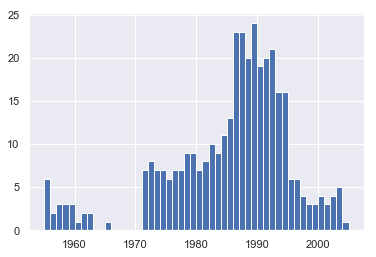

In [11]:
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))

So we can see that for the most part it is kinda proportinal and no one year is missing a large portion of ddata so we will simply remove the rows and continue.

In [12]:
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)

not totally sure as to how that removed the rows. Need to do more research into those comands. But now we are going to check and make sure that they were removed correctly(again same comand as before to check data size and then type).

In [13]:
len(df)

25131

In [14]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

Now that everything checks out we are going to get to plotting our data. Firstly that involves defining variables and reducing our code. Research more into the defplot comand and what that is doing

In [15]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit

def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

Now to plot the mean profits against the year.

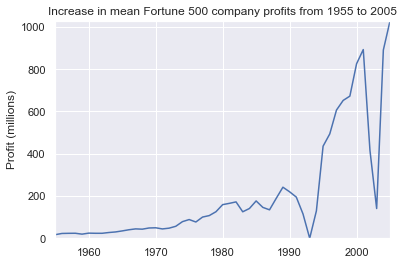

In [17]:
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

So we can see that there is a general increase, now we are going to assess the revenue by using the same comands but different variables.

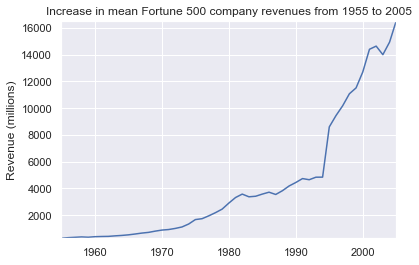

In [18]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

Now we are going to use stack overflow which is another tool to superimpose these graphs with their standard deviation on both sides. WE are going to go ahead and do both in one cell for simplicity. Again need more research into the actuall sintax and whats happening

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


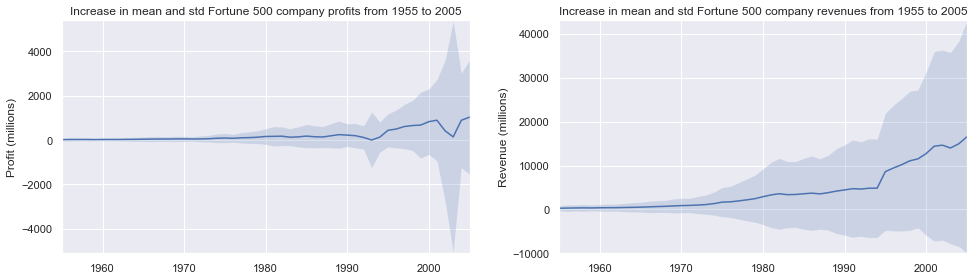

In [19]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)

fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.as_matrix()
stds2 = group_by_year.std().revenue.as_matrix()
plot_with_std(x, y1.as_matrix(), stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.as_matrix(), stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()

In [48]:
type(y2)

pandas.core.series.Series

In [49]:
y2_cut = y2.loc[1990:]

In [61]:
y3_cut = y2.loc[:1970]

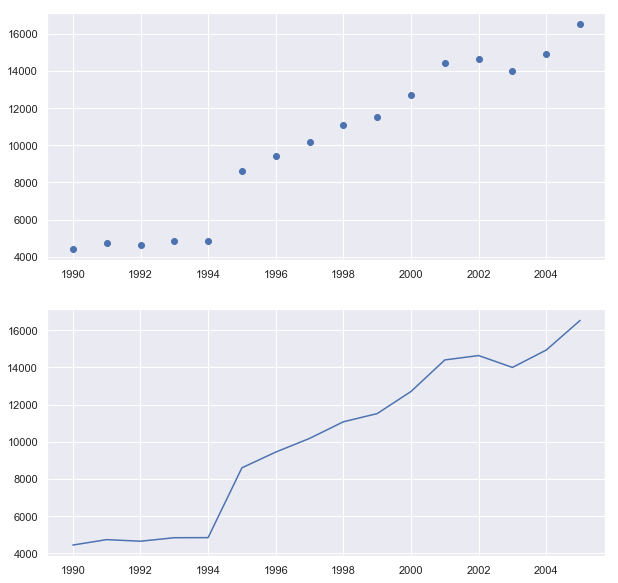

In [60]:
fig,axes = plt.subplots(2,1,figsize=(10,10))
axes[0].scatter(y2_cut.index,y2_cut.values)
axes[1].plot(y2_cut.index,y2_cut.values)


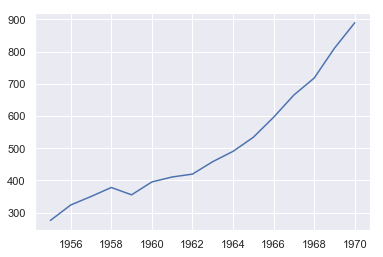

In [64]:
plt.plot(y3_cut.index,y3_cut.values)

Now need to do some digging as to the error messages as I dunno totally what that is.